In [1]:
%matplotlib inline
import matplotlib
from plantcv import plantcv as pcv
from sklearn.cluster import MiniBatchKMeans
import numpy as np

In [2]:
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

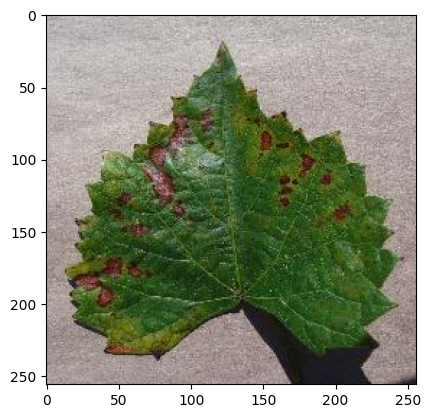

In [3]:
color_img, imgpath, imgname = pcv.readimage(filename="garbage.jpg")

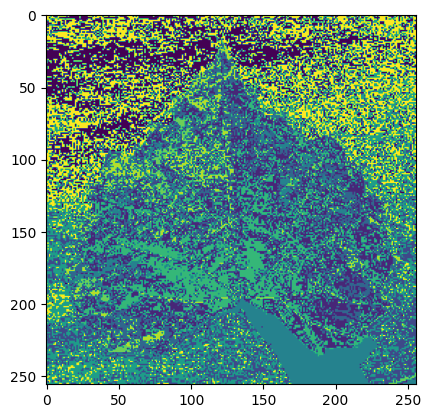

In [4]:
# Create a kmeans model with a defined number of clusters
kmeans = MiniBatchKMeans(n_clusters=10, random_state=999)
# Get the shape of the color image
h, w, d = color_img.shape
# Train the kmeans model with the linearized RGB values
kmeans.fit(color_img.reshape(h * w, d))
# Predict labels for the training image
labels = kmeans.predict(color_img.reshape(h * w, d))
# Reshape the labels into an image
labels = labels.reshape(h, w).astype("uint8")
# Plot the colorized labels
pcv.plot_image(labels, cmap="viridis")

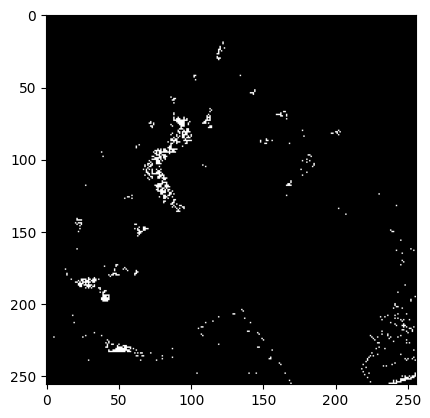

In [5]:
# Create an empty binary mask
kmeans_mask = np.zeros(labels.shape, dtype="uint8")
# kmeans_mask[np.where(np.logical_or(labels == 4, labels == 2))] = 255
# Set the mask to white where the kmeans cluster label overlaps plants
kmeans_mask[np.where(labels == 7)] = 255
# Plot the mask
pcv.plot_image(kmeans_mask)